In [ ]:
import torch
import torch.nn as nn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Deep_learning-datasets/Alcohol_Sales.csv",index_col=0,parse_dates=True)

In [ ]:
df.head()

,S4248SM144NCEN
DATE,
1992-01-01,3459
1992-02-01,3458
1992-03-01,4002
1992-04-01,4564
1992-05-01,4221


In [ ]:
df.columns

Index(['S4248SM144NCEN'], dtype='object')

In [ ]:
len(df)

325

<Axes: xlabel='DATE'>

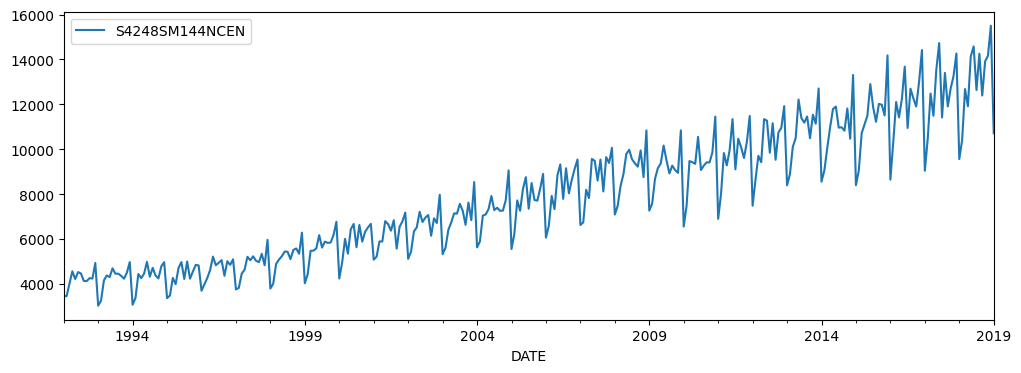

In [ ]:
df.plot(figsize=(12,4))

In [ ]:
y = df['S4248SM144NCEN'].values.astype(float)

In [ ]:
y

array([ 3459.,  3458.,  4002.,  4564.,  4221.,  4529.,  4466.,  4137.,
        4126.,  4259.,  4240.,  4936.,  3031.,  3261.,  4160.,  4377.,
        4307.,  4696.,  4458.,  4457.,  4364.,  4236.,  4500.,  4974.,
        3075.,  3377.,  4443.,  4261.,  4460.,  4985.,  4324.,  4719.,
        4374.,  4248.,  4784.,  4971.,  3370.,  3484.,  4269.,  3994.,
        4715.,  4974.,  4223.,  5000.,  4235.,  4554.,  4851.,  4826.,
        3699.,  3983.,  4262.,  4619.,  5219.,  4836.,  4941.,  5062.,
        4365.,  5012.,  4850.,  5097.,  3758.,  3825.,  4454.,  4635.,
        5210.,  5057.,  5231.,  5034.,  4970.,  5342.,  4831.,  5965.,
        3796.,  4019.,  4898.,  5090.,  5237.,  5447.,  5435.,  5107.,
        5515.,  5583.,  5346.,  6286.,  4032.,  4435.,  5479.,  5483.,
        5587.,  6176.,  5621.,  5889.,  5828.,  5849.,  6180.,  6771.,
        4243.,  4952.,  6008.,  5353.,  6435.,  6673.,  5636.,  6630.,
        5887.,  6322.,  6520.,  6678.,  5082.,  5216.,  5893.,  5894.,
      

In [ ]:
test_size = 12

In [ ]:
train_set = y[:-test_size]
test_set = y[-test_size:]

In [ ]:
test_set

array([10415., 12683., 11919., 14138., 14583., 12640., 14257., 12396.,
       13914., 14174., 15504., 10718.])

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler(feature_range=(-1,1))

In [ ]:
scaler.fit(train_set.reshape(-1,1))

MinMaxScaler(feature_range=(-1, 1))

In [ ]:
train_norm = scaler.transform(train_set.reshape(-1,1))

In [ ]:
train_norm = torch.FloatTensor(train_norm).view(-1)

In [ ]:
window_size = 12

In [ ]:
def input_data(seq,ws):
  out = []
  L = len(seq)
  for i in range(L-ws):
    window = seq[i:i+ws]
    label = seq[i+ws:i+ws+1]
    out.append((window,label))
  return out

In [ ]:
train_data = input_data(train_norm,window_size)

In [ ]:
train_data[0]

(tensor([-0.9268, -0.9270, -0.8340, -0.7379, -0.7966, -0.7439, -0.7547, -0.8109,
         -0.8128, -0.7901, -0.7933, -0.6743]),
 tensor([-1.]))

In [ ]:
class LSTMnetwork(nn.Module):
    def __init__(self,input_size=1,hidden_size=175,output_size=1):
        super().__init__()
        self.hidden_size = hidden_size

        # Add an LSTM layer:
        self.lstm = nn.LSTM(input_size,hidden_size)

        # Add a fully-connected layer:
        self.linear = nn.Linear(hidden_size,output_size)

        # Initialize h0 and c0:
        self.hidden = (torch.zeros(1,1,self.hidden_size),
                       torch.zeros(1,1,self.hidden_size))

    def forward(self,seq):
        lstm_out, self.hidden = self.lstm(
            seq.view(len(seq),1,-1), self.hidden)
        pred = self.linear(lstm_out.view(len(seq),-1))
        return pred[-1]

In [ ]:
torch.manual_seed(101)
model = LSTMnetwork()
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(),lr=0.001)

In [ ]:
model

LSTMnetwork(
  (lstm): LSTM(1, 175)
  (linear): Linear(in_features=175, out_features=1, bias=True)
)

In [ ]:
epochs = 100
import time
start_time = time.time()
for epoch in range(epochs):
  for seq, y_train in train_data:
    optimizer.zero_grad()
    model.hidden = (torch.zeros(1,1,model.hidden_size),(torch.zeros(1,1,model.hidden_size)))
    y_pred = model(seq)
    loss = criterion(y_pred,y_train)
    loss.backward()
    optimizer.step()
  print(f"Epoch {epoch+1} Loss {loss.item()}")
total_time = time.time() - start_time
print(f"Training took {total_time/60} minutes")

Epoch 1 Loss 0.3083672821521759
Epoch 2 Loss 0.194257915019989
Epoch 3 Loss 0.29684871435165405
Epoch 4 Loss 0.47241026163101196
Epoch 5 Loss 0.3479202091693878
Epoch 6 Loss 0.33764582872390747
Epoch 7 Loss 0.32113197445869446
Epoch 8 Loss 0.28340649604797363
Epoch 9 Loss 0.36125051975250244
Epoch 10 Loss 0.3134028911590576
Epoch 11 Loss 0.3532107472419739
Epoch 12 Loss 0.2806110680103302
Epoch 13 Loss 0.3192949891090393
Epoch 14 Loss 0.335287868976593
Epoch 15 Loss 0.23310692608356476
Epoch 16 Loss 0.00018660268688108772
Epoch 17 Loss 3.3177762816194445e-05
Epoch 18 Loss 0.0025318751577287912
Epoch 19 Loss 0.0021022267173975706
Epoch 20 Loss 6.236314948182553e-05
Epoch 21 Loss 0.00149915914516896
Epoch 22 Loss 0.0036140840966254473
Epoch 23 Loss 0.009106127545237541
Epoch 24 Loss 0.02470627799630165
Epoch 25 Loss 0.04093373566865921
Epoch 26 Loss 0.04521391540765762
Epoch 27 Loss 0.018518121913075447
Epoch 28 Loss 0.0027821913827210665
Epoch 29 Loss 0.009484871290624142
Epoch 30 Loss 

In [ ]:
future = 12
preds = train_norm[-window_size:].tolist()
for i in range(future):
  seq = torch.FloatTensor(preds[-window_size:])
  with torch.no_grad():
    model.hidden = (torch.zeros(1,1,model.hidden_size),torch.zeros(1,1,model.hidden_size))
    preds.append(model(seq).item())

In [ ]:
preds[window_size:]

[0.3687499165534973,
 0.5541689991950989,
 0.3724328875541687,
 0.7895312309265137,
 0.9644731283187866,
 0.5890234708786011,
 0.885748565196991,
 0.5131814479827881,
 0.7483425736427307,
 0.7148459553718567,
 0.9615580439567566,
 0.26180535554885864]

In [ ]:
true_predictions = scaler.inverse_transform(np.array(preds[window_size:]).reshape(-1,1))

In [ ]:
true_predictions

array([[11037.50263688],
       [12122.11156079],
       [11059.04617575],
       [13498.8629353 ],
       [14522.1855641 ],
       [12325.9927929 ],
       [14061.68623212],
       [11882.35487998],
       [13257.92988452],
       [13061.99141595],
       [14505.13377813],
       [10411.93042728]])

In [ ]:
df['S4248SM144NCEN'][-12:]

,S4248SM144NCEN
DATE,
2018-02-01,10415
2018-03-01,12683
2018-04-01,11919
2018-05-01,14138
2018-06-01,14583
2018-07-01,12640
2018-08-01,14257
2018-09-01,12396
2018-10-01,13914


In [ ]:
x = np.arange('2018-02-01','2019-02-01',dtype='datetime64[M]')

In [ ]:
x

array(['2018-02', '2018-03', '2018-04', '2018-05', '2018-06', '2018-07',
       '2018-08', '2018-09', '2018-10', '2018-11', '2018-12', '2019-01'],
      dtype='datetime64[M]')

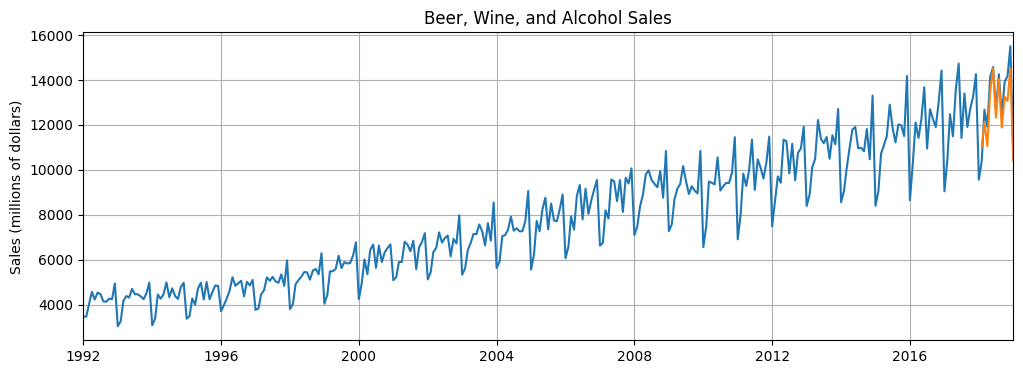

In [ ]:
plt.figure(figsize=(12,4))
plt.title('Beer, Wine, and Alcohol Sales')
plt.ylabel('Sales (millions of dollars)')
plt.grid(True)
plt.autoscale(axis='x',tight=True)
plt.plot(df['S4248SM144NCEN'])
plt.plot(x,true_predictions)
plt.show()

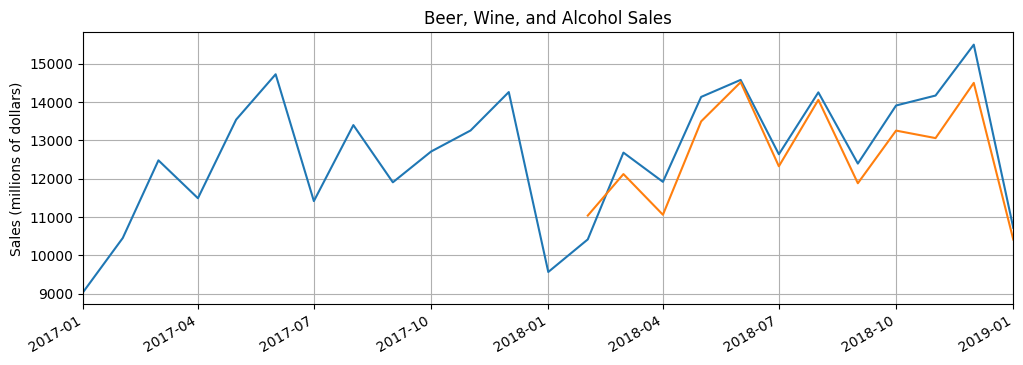

In [ ]:
# Plot the end of the graph
fig = plt.figure(figsize=(12,4))
plt.title('Beer, Wine, and Alcohol Sales')
plt.ylabel('Sales (millions of dollars)')
plt.grid(True)
plt.autoscale(axis='x',tight=True)
fig.autofmt_xdate()

# Select the end of the graph with slice notation:
plt.plot(df['S4248SM144NCEN']['2017-01-01':])
plt.plot(x,true_predictions)
plt.show()

In [ ]:
epochs = 100

# set model to back to training mode
model.train()

# feature scale the entire dataset
y_norm = scaler.fit_transform(y.reshape(-1, 1))
y_norm = torch.FloatTensor(y_norm).view(-1)
all_data = input_data(y_norm,window_size)

import time
start_time = time.time()

for epoch in range(epochs):

    # train on the full set of sequences
    for seq, y_train in all_data:

        # reset the parameters and hidden states
        optimizer.zero_grad()
        model.hidden = (torch.zeros(1,1,model.hidden_size),
                        torch.zeros(1,1,model.hidden_size))

        y_pred = model(seq)

        loss = criterion(y_pred, y_train)
        loss.backward()
        optimizer.step()

    # print training result
    print(f'Epoch: {epoch+1:2} Loss: {loss.item():10.8f}')

print(f'\nDuration: {time.time() - start_time:.0f} seconds')

Epoch:  1 Loss: 0.00368138
Epoch:  2 Loss: 0.02121781
Epoch:  3 Loss: 0.00202710
Epoch:  4 Loss: 0.00002722
Epoch:  5 Loss: 0.00055924
Epoch:  6 Loss: 0.00095791
Epoch:  7 Loss: 0.00021962
Epoch:  8 Loss: 0.00051775
Epoch:  9 Loss: 0.00222283
Epoch: 10 Loss: 0.00008009
Epoch: 11 Loss: 0.00929096
Epoch: 12 Loss: 0.00993205
Epoch: 13 Loss: 0.00063804
Epoch: 14 Loss: 0.00012711
Epoch: 15 Loss: 0.00193880
Epoch: 16 Loss: 0.00105838
Epoch: 17 Loss: 0.00095614
Epoch: 18 Loss: 0.00078699
Epoch: 19 Loss: 0.00026489
Epoch: 20 Loss: 0.00043132
Epoch: 21 Loss: 0.01141654
Epoch: 22 Loss: 0.00648043
Epoch: 23 Loss: 0.07392021
Epoch: 24 Loss: 0.00001687
Epoch: 25 Loss: 0.00135887
Epoch: 26 Loss: 0.00039099
Epoch: 27 Loss: 0.00006632
Epoch: 28 Loss: 0.00001785
Epoch: 29 Loss: 0.00274094
Epoch: 30 Loss: 0.00319048
Epoch: 31 Loss: 0.00006394
Epoch: 32 Loss: 0.00132633
Epoch: 33 Loss: 0.00053278
Epoch: 34 Loss: 0.00068866
Epoch: 35 Loss: 0.00014073
Epoch: 36 Loss: 0.00183204
Epoch: 37 Loss: 0.00083186
E

In [ ]:
window_size = 12
future = 12
preds = y_norm[-window_size:].tolist()
model.eval()
for i in range(future):
  seq = torch.FloatTensor(preds[-window_size:])
  with torch.no_grad():
    model.hidden = (torch.zeros(1,1,model.hidden_size),torch.zeros(1,1,model.hidden_size))
    preds.append(model(seq).item())

In [ ]:
true_predictions = scaler.inverse_transform(np.array(preds).reshape(-1,1))

In [ ]:
true_predictions

array([[10415.00001808],
       [12683.00013363],
       [11919.00006013],
       [14137.99993426],
       [14583.00009555],
       [12640.00017402],
       [14257.00005591],
       [12395.9999277 ],
       [13913.99994579],
       [14173.99995232],
       [15504.        ],
       [10717.99998423],
       [10139.36658571],
       [12807.11295223],
       [11656.58626142],
       [13889.10073251],
       [14627.38398498],
       [13226.55185914],
       [14875.27060956],
       [12297.70596847],
       [13991.91300142],
       [14477.00437915],
       [15284.79339725],
       [10829.27929784]])

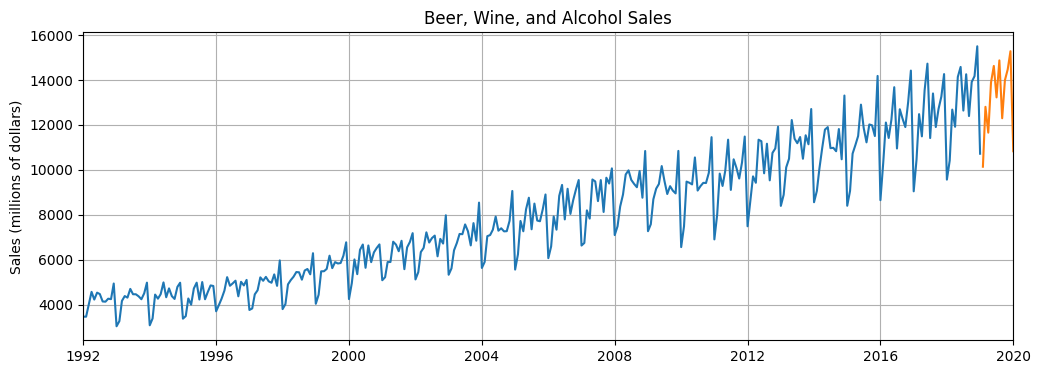

In [ ]:
x = np.arange('2019-02-01', '2020-02-01', dtype='datetime64[M]').astype('datetime64[D]')
plt.figure(figsize=(12,4))
plt.title('Beer, Wine, and Alcohol Sales')
plt.ylabel('Sales (millions of dollars)')
plt.grid(True)
plt.autoscale(axis='x',tight=True)
plt.plot(df['S4248SM144NCEN'])
plt.plot(x,true_predictions[window_size:])
plt.show()

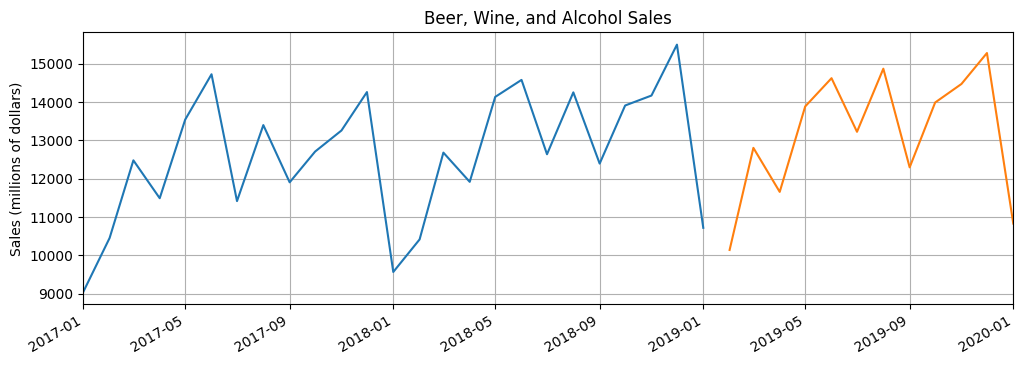

In [ ]:
fig = plt.figure(figsize=(12,4))
plt.title('Beer, Wine, and Alcohol Sales')
plt.ylabel('Sales (millions of dollars)')
plt.grid(True)
plt.autoscale(axis='x',tight=True)
fig.autofmt_xdate()
plt.plot(df['S4248SM144NCEN']['2017-01-01':])
plt.plot(x,true_predictions[window_size:])
plt.show()